In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import pandas as pd
import spacy
import re
import dagshub


nltk.download('punkt')
nltk.download('stopwords')





[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#import data

!pip3 install dagshub

pip install spacy

!pip3 install mlflow dagshub



Successfully mounted DagsHub Storage in 'IREX-El-Salvador-Sentiment' to 
'IREX-El-Salvador-Sentiment/dagshub_storage'.

To unmount, run `dagshub.storage.unmount(repo="Omdena/IREX-El-Salvador-Sentiment", 
path="IREX-El-Salvador-Sentiment/dagshub_storage")`.

In [ ]:
spacy.cli.download("es_core_news_sm")


✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
mount_path = dagshub.storage.mount('Omdena/IREX-El-Salvador-Sentiment')
df = pd.read_csv('IREX-El-Salvador-Sentiment/dagshub_storage/sentiment_beto_sample_bukele.csv')

Successfully mounted DagsHub Storage in 'IREX-El-Salvador-Sentiment' to 
'IREX-El-Salvador-Sentiment/dagshub_storage'.

To unmount, run `dagshub.storage.unmount(repo="Omdena/IREX-El-Salvador-Sentiment", 
path="IREX-El-Salvador-Sentiment/dagshub_storage")`.

In [ ]:
!ls IREX-El-Salvador-Sentiment/dagshub_storage

df_total.csv  sentiment_beto_sample_bukele.csv	src


In [ ]:
df.head()

,Post Type,Profile Name,Date,Time,Likes,Text,AP,AP + JA Revised,sentiment_output,sentiment_probability,English Text (Google Translate),Match
0,Astronaut Post,Elizabeth Menjivar,2024-04-13,03:29:29,43,Dios lo bendiga por ser un gran ser humano,POS,POS,POS,0.997756,God bless him for being a great human being.,True
1,Astronaut Post,Mila Mijango,2024-04-17,17:29:01,6,"Me encanta la humanidad de nuestro astronauta,...",POS,POS,POS,0.998780,"I love the humanity of our astronaut, a man wi...",True
2,Astronaut Post,Any Rodríguez,2024-04-13,04:00:29,18,Dos grandes hombres haciendo historia. Gracias...,POS,POS,POS,0.998589,Two great men making history. Thank you for al...,True
3,Astronaut Post,Sara Cespedes,2024-04-13,08:22:47,136,Nayib y Frank dos grandes ejemplo de umildad y...,POS,POS,POS,0.998770,"Nayib and Frank, two great examples of humilit...",True
4,Astronaut Post,Martha Morales,2024-04-13,03:13:56,70,A Colombia le falta un precidente con este ...,NEU,POS,POS,0.984938,"Colombia lacks a precedent with this one, I am...",False


In [ ]:
df.isnull().sum()

Post Type                          0
Profile Name                       0
Date                               0
Time                               0
Likes                              0
Text                               0
AP                                 0
AP + JA Revised                    4
sentiment_output                   0
sentiment_probability              0
English Text (Google Translate)    0
Match                              0
dtype: int64

In [ ]:



# Load your dataset into a DataFrame
#df = pd.read_csv(r'C:\Users\DhalS\OneDrive - Kantar\Desktop\Omdena\sentiment_beto_withlabels.csv')

# Map sentiment classes to numerical labels
sentiment_mapping = {'POS': 0, 'NEU': 1, 'NEG': 2}

# Add numerical sentiment labels to the main DataFrame
df['sentiment_numeric'] = df['AP'].map(sentiment_mapping)


# Display the first few rows of the DataFrame
df.head(2)


,Post Type,Profile Name,Date,Time,Likes,Text,AP,AP + JA Revised,sentiment_output,sentiment_probability,English Text (Google Translate),Match,sentiment_numeric
0,Astronaut Post,Elizabeth Menjivar,2024-04-13,03:29:29,43,Dios lo bendiga por ser un gran ser humano,POS,POS,POS,0.997756,God bless him for being a great human being.,True,0
1,Astronaut Post,Mila Mijango,2024-04-17,17:29:01,6,"Me encanta la humanidad de nuestro astronauta,...",POS,POS,POS,0.998780,"I love the humanity of our astronaut, a man wi...",True,0


In [ ]:


# Load the spaCy model for Spanish
nlp = spacy.load('es_core_news_sm')

# Initialize the Snowball stemmer for Spanish
stemmer = SnowballStemmer('spanish')

# Define a list of stopwords
stop_words = set(nltk.corpus.stopwords.words('spanish'))

# Function to preprocess text
def preprocess_text(text):
    # Remove special characters (keeping numbers) and convert to lowercase
    text = re.sub(r'[^a-zA-ZáéíóúÁÉÍÓÚñÑüÜ0-9]', ' ', text)
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text)
    # Convert text to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # Reconstruct the text
    processed_text = ' '.join(filtered_tokens)
    return processed_text

# Function to apply lemmatization and stemming to text
def lemmatize_and_stem(text):
    # Lemmatize using spaCy
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in doc]

    # Stem using NLTK SnowballStemmer
    stemmed_tokens = [stemmer.stem(token) for token in lemmatized_tokens]

    # Reconstruct the text
    processed_text = ' '.join(stemmed_tokens)
    return processed_text

# Apply preprocessing, lemmatization, and stemming to the 'Text' column
df['processed_text'] = df['Text'].apply(preprocess_text).apply(lemmatize_and_stem)

# Display the first few rows of the DataFrame with processed text
print(df[['Text', 'processed_text']].head())


                                                Text  \
0         Dios lo bendiga por ser un gran ser humano   
1  Me encanta la humanidad de nuestro astronauta,...   
2  Dos grandes hombres haciendo historia. Gracias...   
3  Nayib y Frank dos grandes ejemplo de umildad y...   
4  A Colombia  le falta  un precidente  con este ...   

                                      processed_text  
0                      dio bendig ser gran ser human  
1  encant human astronaut hombr nivel educ academ...  
2  dos grand hombr hac histori graci permitirn se...  
3  nayib frank dos grand ejempl umild sabidur syd...  
4  colombi falt precident fiel seguidor precident...  


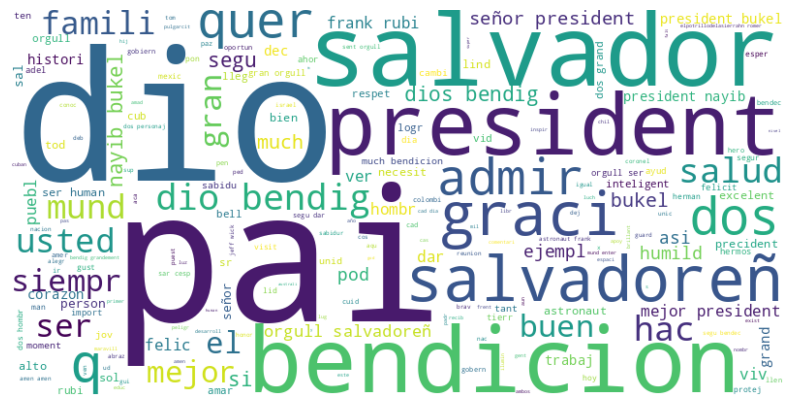

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_word_cloud(dataframe, column_name, width=800, height=400, background_color='white'):
    """
    Generate a word cloud from preprocessed text in a DataFrame column.

    Args:
    - dataframe: The DataFrame containing the text data.
    - column_name: The name of the column containing the preprocessed text.
    - width: Width of the word cloud image.
    - height: Height of the word cloud image.
    - background_color: Background color of the word cloud image.

    Returns:
    - None. Displays the word cloud image.
    """
    # Combine all preprocessed text into a single string
    all_text = ' '.join(dataframe[column_name])

    # Generate a word cloud image
    wordcloud = WordCloud(width=width, height=height, background_color=background_color).generate(all_text)

    # Display the word cloud image
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Example usage
generate_word_cloud(df, 'processed_text')


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import mlflow
from dagshub import dagshub_logger

In [ ]:

# Initialize DagsHub for MLflow tracking
dagshub.init("IREX-El-Salvador-Sentiment", "Omdena", mlflow=True)

Initialized MLflow to track repo "Omdena/IREX-El-Salvador-Sentiment"

Repository Omdena/IREX-El-Salvador-Sentiment initialized!

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['processed_text'], df['sentiment_numeric'], test_size=0.2, random_state=42)

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Fit-transform the training data and transform the test data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Check the shape of the TF-IDF matrix
print("Shape of the TF-IDF matrix for training data:", X_train_tfidf.shape)
print("Shape of the TF-IDF matrix for test data:", X_test_tfidf.shape)


Shape of the TF-IDF matrix for training data: (266, 1000)
Shape of the TF-IDF matrix for test data: (67, 1000)


In [ ]:
# Define a list of classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': XGBClassifier(),
    'Naive Bayes': MultinomialNB()
}


In [ ]:
# Initialize an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Classifier', 'Training Accuracy', 'Test Accuracy'])


In [ ]:
# Define a function to train and evaluate the classifier
def train_and_evaluate_classifier(clf, clf_name, X_train, y_train, X_test, y_test):
    # Train the classifier
    clf.fit(X_train, y_train)

    # Evaluate the classifier on training data
    y_pred_train = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_pred_train)

    # Evaluate the classifier on test data
    y_pred_test = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test, average='weighted')
    precision = precision_score(y_test, y_pred_test, average='weighted')
    recall = recall_score(y_test, y_pred_test, average='weighted')

    # Log the experiment with MLflow and DagsHub
    with mlflow.start_run(run_name=clf_name):
        # Log parameters
        mlflow.log_params(clf.get_params())
        mlflow.log_param("Classifier", clf_name)

        # Log metrics
        mlflow.log_metric("Training Accuracy", train_accuracy)
        mlflow.log_metric("accuracy", test_accuracy)
        mlflow.log_metric("f1_score", f1)
        mlflow.log_metric("precision_score", precision)
        mlflow.log_metric("recall_score", recall)

        # Log the model
        mlflow.sklearn.log_model(clf, f'{clf_name}_model')

        # Add tags
        mlflow.set_tag("estimator_name", clf_name)
        mlflow.set_tag("transformer", "TfidfVectorizer")

    return pd.DataFrame({'Classifier': [clf_name], 'Training Accuracy': [train_accuracy], 'Test Accuracy': [test_accuracy]})


In [ ]:
# Iterate over each classifier
for clf_name, clf in classifiers.items():
    # Train and evaluate the classifier
    results = train_and_evaluate_classifier(clf, clf_name, X_train_tfidf, y_train, X_test_tfidf, y_test)

    # Append the results to the DataFrame
    results_df = pd.concat([results_df, results], ignore_index=True)

print(results_df)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

                Classifier  Training Accuracy  Test Accuracy
0                      KNN           0.793233       0.746269
1      Logistic Regression           0.928571       0.805970
2            Random Forest           0.996241       0.865672
3   Support Vector Machine           0.951128       0.791045
4            Decision Tree           0.996241       0.791045
5                  XGBoost           0.992481       0.880597
6              Naive Bayes           0.849624       0.776119
7                      KNN           0.793233       0.746269
8      Logistic Regression           0.928571       0.805970
9            Random Forest           0.996241       0.910448
10  Support Vector Machine           0.951128       0.791045
11           Decision Tree           0.996241       0.820896
12                 XGBoost           0.992481       0.880597
13             Naive Bayes           0.849624       0.776119


In [ ]:
results_df

,Classifier,Training Accuracy,Test Accuracy
0,KNN,0.793233,0.746269
1,Logistic Regression,0.928571,0.805970
2,Random Forest,0.996241,0.865672
3,Support Vector Machine,0.951128,0.791045
4,Decision Tree,0.996241,0.791045
5,XGBoost,0.992481,0.880597
6,Naive Bayes,0.849624,0.776119


In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Initialize the XGBoost classifier
xgb = XGBClassifier()

# Perform grid search
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(X_train_tfidf, y_train)

# Get the best parameters and best score
best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier()

# Perform grid search
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_tfidf, y_train)

# Get the best parameters and best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

# Print the best parameters and best scores
print("XGBoost - Best Parameters:", best_params_xgb)
print("XGBoost - Best Score:", best_score_xgb)
print("Random Forest - Best Parameters:", best_params_rf)
print("Random Forest - Best Score:", best_score_rf)


XGBoost - Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
XGBoost - Best Score: 0.7782669461914745
Random Forest - Best Parameters: {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest - Best Score: 0.736827393431167


In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Initialize the XGBoost classifier
xgb = XGBClassifier()

# Perform grid search
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(X_train_tfidf, y_train)

# Get the best parameters and best score
best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_

In [ ]:
# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier()

# Perform grid search
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_tfidf, y_train)

# Get the best parameters and best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_


In [ ]:
# Print the best parameters and best scores
print("XGBoost - Best Parameters:", best_params_xgb)
print("XGBoost - Best Score:", best_score_xgb)
print("Random Forest - Best Parameters:", best_params_rf)
print("Random Forest - Best Score:", best_score_rf)

XGBoost - Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
XGBoost - Best Score: 0.8157232704402515
Random Forest - Best Parameters: {'max_depth': 7, 'min_samples_split': 10, 'n_estimators': 100}
Random Forest - Best Score: 0.7255765199161425
